# <center><font color = 'blue'> Feature Engineering, Oversampling and Scaling</font> <center>

---
This project will go through the following steps to build a Machine Learning model for our chosen dataset:
1. EDA and Visualization
2. **Feature Engineering, Oversampling and Scaling**
3. Model Buiding and Hyperparameter Tuning


# **Introduction**

In our previous notebook(EDA and Visualization.ipynb), we performed exploratory data analysis (EDA) and visualization on our chosen dataset to gain a better understanding of our target variable and the different variables available.

However, as our dataset contains categorical columns and is unbalanced, we need to apply specific techniques to preprocess our data before training our machine learning model. Specifically, we need to encode our categorical variables, balance our dataset using oversampling techniques, and normalize our data to ensure optimal performance of our model.

In this notebook, we will explore various encoding, oversampling, and normalization methods to determine which techniques work best for our dataset. By comparing different approaches and measuring their performance using appropriate evaluation metrics, we aim to identify the most effective techniques for our specific problem and improve the performance of our machine learning model.

## Load Libraries

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler

import category_encoders as ce

## Load Data

In [2]:
# Load data from CSV file
df = pd.read_csv('BankChurners.csv')

In [3]:
# Shape 
df.shape

(10127, 23)

In [4]:
# drop unuseful columns
df.drop(['CLIENTNUM',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis=1, inplace=True)

In [5]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Categorical variables

In [6]:
# Checking the non-numeric columns
df_cat = df.select_dtypes(exclude=[np.number])

# Dropping Attrition_Flag as it's the target.
df_cat.drop(columns='Attrition_Flag', inplace=True)
df_cat

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...
10122,M,Graduate,Single,$40K - $60K,Blue
10123,M,Unknown,Divorced,$40K - $60K,Blue
10124,F,High School,Married,Less than $40K,Blue
10125,M,Graduate,Unknown,$40K - $60K,Blue


### Numerical variables

In [7]:
df_num = df.select_dtypes(exclude=[np.object])
df_num

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


There are 5 categorical variables, and 14 numerical variables. 

# Feature Engineering

## Splitting train and test data

We are splitting the train and test data before performing feature engineering techniques to avoid data-leakage.

In [8]:
X = df.drop(columns='Attrition_Flag')
y = df['Attrition_Flag']

print(X.shape)
print(y.shape)

(10127, 19)
(10127,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
print ("training X data points: {}".format(len(X_train)))
print ("testing X data points: {}".format(len(X_test)))

print ("training y data points: {}".format(len(y_train)))
print ("testing y data points: {}".format(len(y_test)))

training X data points: 6785
testing X data points: 3342
training y data points: 6785
testing y data points: 3342


## Create a function to evaluate model performance
* ML algorithm used: Random Forest
* Metrics used: ROC-AUC score (performs better than Accuracy for imbalanced dataset)

In [31]:
def RF_ROC(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_jobs=-1, random_state= 42, max_depth = 5)
    rf.fit(X_train, y_train)
    
    print("Train set")
    train_pred = rf.predict_proba(X_train)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_train, train_pred[:,1])))
    
    print("Test set")
    test_pred = rf.predict_proba(X_test)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_test, test_pred[:, 1])))
    
    return roc_auc_score(y_train, train_pred[:,1]), roc_auc_score(y_test, test_pred[:, 1])

## Find the best encoder for the categorical variables
**Categorical Encoding techniques tested:**
* One-Hot Encoding
* Ordinal Encoding
* CatBoost Encoding


In [12]:
# categorical columns
df_cat.columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [13]:
# How many unique values does each categorical variable has? 
# What are they?

for col in df_cat.columns:
    print(col,'has {} unique values.'.format(df_cat[col].nunique()))
    print(df_cat[col].unique())
    print('------------------------------------------------------------')

Gender has 2 unique values.
['M' 'F']
------------------------------------------------------------
Education_Level has 7 unique values.
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
------------------------------------------------------------
Marital_Status has 4 unique values.
['Married' 'Single' 'Unknown' 'Divorced']
------------------------------------------------------------
Income_Category has 6 unique values.
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
------------------------------------------------------------
Card_Category has 4 unique values.
['Blue' 'Gold' 'Silver' 'Platinum']
------------------------------------------------------------


### One-Hot Encoding
Applying One-Hot Encoding using pd.get_dummies

In [14]:
# Make copies of the original dataset
X_train_ohe = X_train.copy()
X_test_ohe = X_test.copy()

X_train_OHE = pd.get_dummies(data = X_train_ohe)
X_test_OHE = pd.get_dummies(data = X_test_ohe)

In [15]:
X_train_OHE

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
1163,52,2,42,5,3,2,21782.0,1006,20776.0,0.654,...,0,0,0,1,0,0,1,0,0,0
1584,50,2,36,5,3,2,5965.0,688,5277.0,0.673,...,0,0,1,0,0,0,1,0,0,0
6332,43,3,25,5,1,2,10305.0,1870,8435.0,0.722,...,0,0,0,0,0,1,1,0,0,0
3643,44,3,38,4,6,4,26516.0,1434,25082.0,0.472,...,0,0,0,0,0,1,1,0,0,0
6006,34,2,36,5,1,3,2763.0,1913,850.0,0.598,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,44,1,38,3,2,5,4142.0,2517,1625.0,0.809,...,0,1,0,0,0,0,1,0,0,0
5191,53,3,36,4,3,6,7939.0,0,7939.0,0.551,...,0,0,0,0,0,1,1,0,0,0
5390,42,4,32,3,1,2,2314.0,1547,767.0,0.804,...,0,0,0,0,1,0,1,0,0,0
860,40,3,28,4,1,1,3563.0,1707,1856.0,0.506,...,0,1,0,0,0,0,1,0,0,0


### Ordinal Encoding

In [16]:
# Make a copy of the whole dataset. 
# As applying ordinal encoder doesn't introduce data leakage, to avoid 'unknow category' issue, we will apply it to the whole dataset.
X_oe = X.copy()
oe = OrdinalEncoder()
X_oe = oe.fit_transform(X_oe)

X_oe = pd.DataFrame(X_oe,columns=X.columns)


In [17]:
X_oe

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,19.0,1.0,3.0,3.0,1.0,2.0,0.0,26.0,4.0,1.0,3.0,4623.0,324.0,4935.0,987.0,217.0,32.0,791.0,58.0
1,23.0,0.0,5.0,2.0,2.0,4.0,0.0,31.0,5.0,1.0,2.0,3623.0,408.0,3949.0,1073.0,338.0,23.0,829.0,102.0
2,25.0,1.0,3.0,2.0,1.0,3.0,0.0,23.0,3.0,1.0,0.0,1623.0,0.0,2485.0,1154.0,893.0,10.0,818.0,0.0
3,14.0,0.0,4.0,3.0,3.0,4.0,0.0,21.0,2.0,4.0,1.0,1552.0,1973.0,686.0,1020.0,236.0,10.0,818.0,757.0
4,14.0,1.0,3.0,5.0,1.0,2.0,0.0,8.0,4.0,1.0,0.0,2363.0,0.0,3089.0,1145.0,65.0,18.0,821.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,24.0,1.0,2.0,2.0,2.0,1.0,0.0,27.0,2.0,2.0,3.0,1975.0,1382.0,1772.0,427.0,4874.0,107.0,517.0,459.0
10123,15.0,1.0,2.0,6.0,0.0,1.0,0.0,12.0,3.0,2.0,3.0,2139.0,1698.0,1738.0,528.0,4244.0,59.0,363.0,508.0
10124,18.0,0.0,1.0,3.0,1.0,4.0,0.0,23.0,4.0,3.0,4.0,2671.0,0.0,3348.0,543.0,4351.0,50.0,483.0,0.0
10125,4.0,1.0,2.0,2.0,3.0,1.0,0.0,23.0,3.0,3.0,3.0,2615.0,0.0,3305.0,259.0,4160.0,52.0,399.0,0.0


In [18]:
# Then split to train and test 
X_train_ORD, X_test_ORD, y_train, y_test = train_test_split(X_oe, y, test_size=0.33, random_state=42)

### Catboost Encoder

Catboost is a recently created target-based categorical encoder.

It is intended to overcome target leakage problems inherent in LeaveOneOut Encoder.

In [21]:
X_train_cbe = X_train.copy()
X_test_cbe = X_test.copy()

cbe = ce.CatBoostEncoder()

# Map strings to integers for the target column.
y1=y_train.map({'Existing Customer':0,'Attrited Customer':1 })

X_train_CBE = cbe.fit_transform(X_train_cbe,y1)
X_test_CBE = cbe.transform(X_test_cbe)


In [22]:
X_train_CBE = pd.DataFrame(X_train_CBE,columns=X_train_cbe.columns)
X_train_CBE

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1163,52,0.160059,2,0.160059,0.160059,0.160059,0.160059,42,5,3,2,21782.0,1006,20776.0,0.654,1537,35,0.591,0.046
1584,50,0.080029,2,0.160059,0.160059,0.160059,0.080029,36,5,3,2,5965.0,688,5277.0,0.673,3382,58,1.071,0.115
6332,43,0.160059,3,0.160059,0.080029,0.160059,0.053353,25,5,1,2,10305.0,1870,8435.0,0.722,4018,63,0.800,0.181
3643,44,0.080029,3,0.080029,0.080029,0.080029,0.040015,38,4,6,4,26516.0,1434,25082.0,0.472,3609,76,0.551,0.054
6006,34,0.053353,2,0.080029,0.053353,0.080029,0.032012,36,5,1,3,2763.0,1913,850.0,0.598,4136,69,0.568,0.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,44,0.176186,1,0.154432,0.164896,0.147362,0.160872,38,3,2,5,4142.0,2517,1625.0,0.809,2104,44,0.833,0.608
5191,53,0.176417,3,0.153171,0.170234,0.179531,0.161005,36,4,3,6,7939.0,0,7939.0,0.551,2269,42,0.312,0.000
5390,42,0.176647,4,0.154832,0.157899,0.171364,0.161137,32,3,1,2,2314.0,1547,767.0,0.804,4678,74,1.000,0.669
860,40,0.141750,3,0.163687,0.165212,0.148066,0.161112,28,4,1,1,3563.0,1707,1856.0,0.506,1482,42,0.312,0.479


In [23]:
X_test_CBE = pd.DataFrame(X_test_CBE,columns=X_test_cbe.columns)
X_test_CBE

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3781,48,0.176598,3,0.159436,0.165087,0.171292,0.161061,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
2922,59,0.141662,1,0.159436,0.165087,0.171292,0.161061,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
5070,37,0.176598,2,0.154759,0.171852,0.171292,0.161061,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
7246,47,0.141662,3,0.228436,0.171852,0.147944,0.161061,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
623,42,0.141662,3,0.163525,0.165087,0.156224,0.161061,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,60,0.141662,1,0.154759,0.165087,0.156224,0.161061,55,6,2,1,11524.0,0,11524.0,0.682,3598,72,0.532,0.000
3838,55,0.141662,1,0.228436,0.165087,0.136723,0.161061,36,3,3,3,15221.0,1166,14055.0,0.839,3848,68,0.619,0.077
1952,54,0.176598,3,0.153681,0.154311,0.171292,0.161061,41,5,4,4,3161.0,1220,1941.0,0.820,2412,62,0.824,0.386
555,36,0.176598,4,0.163525,0.154311,0.180661,0.161061,31,5,2,0,15700.0,1276,14424.0,1.389,2229,48,0.778,0.081


### Evaluate model performance with the 3 encoders above

In [83]:
encoders = {"OHE": RF_ROC(X_train_OHE, X_test_OHE, y_train, y_test),
               "ORD": RF_ROC(X_train_ORD, X_test_ORD, y_train, y_test),
               "CBE": RF_ROC(X_train_CBE, X_test_CBE, y_train, y_test)}

Train set
Random Forests roc-auc: 0.9690782881039192
Test set
Random Forests roc-auc: 0.9531834748746321
Train set
Random Forests roc-auc: 0.9764366919077593
Test set
Random Forests roc-auc: 0.9661765899556601
Train set
Random Forests roc-auc: 0.9764080933070549
Test set
Random Forests roc-auc: 0.9658235341088244


In [84]:
Encoders = pd.DataFrame(encoders,index=['Train','Test']).T
Encoders['diff']=Encoders['Train']-Encoders['Test']
Encoders

,Train,Test,diff
OHE,0.969078,0.953183,0.015895
ORD,0.976437,0.966177,0.010260
CBE,0.976408,0.965824,0.010585


* **Observation:** Ordinal encoder and Catboost encoder has similar performance which is better than Onehot encoder's.

* We will go with **Ordinal encoder** as it's slightly better, and it doesn't introduce any data leakage.

## Over Sampling
**Over-sampling method tested:**
* RandomOverSampler
* Synthetic Minority Oversampling Technique (SMOTE)
* Adaptive Synthetic (ADASYN)
* BorderlineSMOTE
* SVMSMOTE
* KMeansSMOTE

### RandomOverSampler
Object to over-sample the minority class(es) by picking samples at random with replacement. 

In [60]:
# Make copies of datasets
X_train_ros = X_train_ORD.copy()
X_test_ros = X_test_ORD.copy()

ros = RandomOverSampler(random_state=42)

X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train_ros, y_train) # y_train

### Synthetic Minority Oversampling Technique (SMOTE)

In [62]:
# Make copies of datasets
X_train_smo = X_train_ORD.copy()
X_test_smo = X_test_ORD.copy()

smo = SMOTE(random_state=42)

X_resampled_smo, y_resampled_smo = smo.fit_resample(X_train_smo, y_train) # y_train

### Adaptive Synthetic (ADASYN)

In [63]:
# Make copies of datasets
X_train_ada = X_train_ORD.copy()
X_test_ada = X_test_ORD.copy()

ada = ADASYN(random_state=42)

X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train_ada, y_train) # y_train

### BorderlineSMOTE

In [67]:
# Make copies of datasets
X_train_bor = X_train_ORD.copy()
X_test_bor = X_test_ORD.copy()

bor = BorderlineSMOTE(random_state=42)

X_resampled_bor, y_resampled_bor = bor.fit_resample(X_train_bor, y_train) # y_train

### SVMSMOTE

In [68]:
# Make copies of datasets
X_train_svm = X_train_ORD.copy()
X_test_svm = X_test_ORD.copy()

svm = SVMSMOTE(random_state=42)

X_resampled_svm, y_resampled_svm = svm.fit_resample(X_train_svm, y_train) # y_train

### KMeansSMOTE

In [73]:
# Make copies of datasets
X_train_km = X_train_ORD.copy()
X_test_km = X_test_ORD.copy()

km = KMeansSMOTE(kmeans_estimator=20, random_state=42)

X_resampled_km, y_resampled_km = km.fit_resample(X_train_km, y_train) # y_train

### Evaluate model performance with the different over-sampling methods

In [81]:
oversampler= {'random':RF_ROC(X_resampled_ros, X_test_ros, y_resampled_ros, y_test),
                'SMOTE':RF_ROC(X_resampled_smo, X_test_smo, y_resampled_smo, y_test),
                'ADASYN':RF_ROC(X_resampled_ada, X_test_ada, y_resampled_ada, y_test),
             'BorderlineSMOTE':RF_ROC(X_resampled_bor, X_test_bor, y_resampled_bor, y_test),
              'SVMSMOTE':RF_ROC(X_resampled_svm, X_test_svm, y_resampled_svm, y_test),
             'KMeansSMOTE':RF_ROC(X_resampled_km, X_test_km, y_resampled_km, y_test),}

Train set
Random Forests roc-auc: 0.9743244482728797
Test set
Random Forests roc-auc: 0.9604075914266162
Train set
Random Forests roc-auc: 0.9851052081953899
Test set
Random Forests roc-auc: 0.9609573026797269
Train set
Random Forests roc-auc: 0.9846413119853318
Test set
Random Forests roc-auc: 0.9551767555949453
Train set
Random Forests roc-auc: 0.9857642575183578
Test set
Random Forests roc-auc: 0.9540994403239931
Train set
Random Forests roc-auc: 0.9822913862576779
Test set
Random Forests roc-auc: 0.960953673133638
Train set
Random Forests roc-auc: 0.9922691251387337
Test set
Random Forests roc-auc: 0.9441195084142777


In [82]:
oversampler = pd.DataFrame(oversampler,index=['Train', 'Test']).T
oversampler['diff']=oversampler['Train']-oversampler['Test']
oversampler

,Train,Test,diff
random,0.974324,0.960408,0.013917
SMOTE,0.985105,0.960957,0.024148
ADASYN,0.984641,0.955177,0.029465
BorderlineSMOTE,0.985764,0.954099,0.031665
SVMSMOTE,0.982291,0.960954,0.021338
KMeansSMOTE,0.992269,0.944120,0.048150


* **Observation:** KMeansSMOTE got the highest score on train set, while SMOTE has the highest score on test set. Randomoversampler offers the smallest difference between train and test.
* We will go with **SMOTE** for its overall performance.

## Numerical Data Scaling
**Scaling techniques tested:**
* Standard scaler
* Minmax scaler

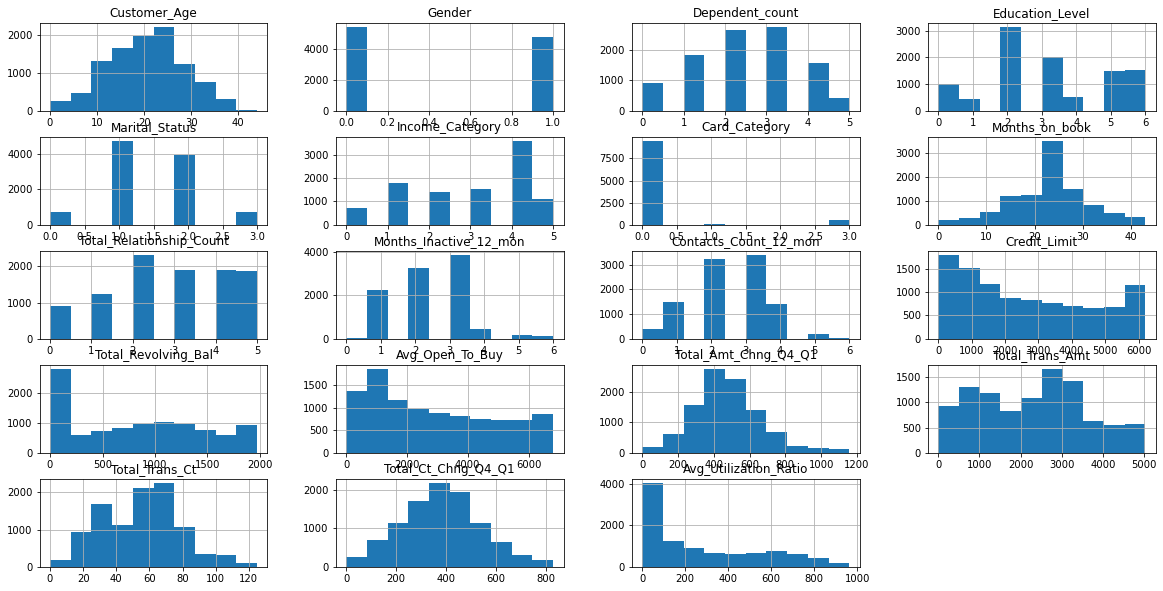

In [26]:
# A quick look of the ditribution of the data
X_oe.hist(figsize=(20,10))
plt.show()

### Standardization
StandardScaler is used to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1.

In [87]:
# Make copies of datasets
X_train_st = X_resampled_smo.copy()
X_test_st = X_test_ORD.copy()

# Initialize the scaler
st_scaler = StandardScaler()

# Fit it to the train set
st_scaler.fit(X_train_st)

# Transform to train and test set
X_train_ST = st_scaler.transform(X_train_st)
X_test_ST =st_scaler.transform(X_test_st)

# Create dataframe
X_train_ST = pd.DataFrame(X_train_ST, columns=X_train_st.columns)
X_test_ST = pd.DataFrame(X_test_ST, columns=X_test_st.columns)

In [88]:
X_train_ST

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.734189,1.170097,-0.288757,-0.637725,-0.654686,0.071386,-0.263129,0.790379,0.958497,0.554118,-0.634471,1.542291,-0.164826,1.520616,-0.401104,-1.110146,-0.976744,-0.294071,-0.662142
1,0.463065,1.170097,-0.288757,-1.804946,0.803409,-0.636041,-0.263129,-0.013882,0.958497,0.554118,-0.634471,0.179367,-0.603433,0.202263,-0.301854,-0.003432,0.044156,1.967580,-0.409086
2,-0.485870,-0.945513,0.543468,-0.054115,0.803409,1.486240,-0.263129,-1.488360,0.958497,-1.585363,-0.634471,0.811419,1.061835,0.679853,-0.045891,0.387714,0.266091,0.821514,-0.167033
3,-0.350308,-0.945513,0.543468,-0.054115,-0.654686,1.486240,-0.263129,0.254205,0.280187,3.763339,1.267305,1.682747,0.446347,1.661594,-1.351822,0.126950,0.843121,-0.507434,-0.632802
4,-1.705929,1.170097,-0.288757,-0.637725,-0.654686,-0.636041,-0.263129,-0.013882,0.958497,-1.585363,0.316417,-0.721056,1.123671,-1.101787,-0.693633,0.475914,0.532412,-0.415992,1.707044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,-1.946351,-0.924681,-1.104593,-0.637725,-0.640329,0.764882,-0.263129,-1.726089,-1.748066,-0.494556,0.307054,-0.269254,-0.921541,-0.101910,0.257159,1.514528,0.306107,0.450460,-0.623750
11394,-0.124352,-0.945513,-0.685038,1.001972,-0.654686,0.778813,-0.263129,0.209542,0.474010,-0.260933,-0.634471,-0.476836,-0.951443,-0.224736,-0.036447,1.357799,0.642322,0.937050,-0.819843
11395,-2.400607,-0.565289,-1.654067,0.155662,0.803409,1.104817,-0.263129,-2.687339,-1.632837,-0.515623,1.096408,0.223046,-0.951443,0.357972,-1.467948,-1.464259,-1.581183,-0.712341,-0.819843
11396,0.712131,-0.945513,-0.946779,-0.149076,0.803409,-0.751148,-0.263129,-0.013882,-0.256139,0.554118,0.117375,0.663173,0.885683,0.530314,0.320350,-0.283017,-0.444100,0.447204,-0.126268


### Min-Max Normalization 
Min-max scalling rescales the range of features to scale the range in [0, 1] or [−1, 1].

In [89]:
# Make copies of datasets
X_train_minmax = X_resampled_smo.copy()
X_test_minmax = X_test_ORD.copy()

# Initialize the scaler
minmax_scaler = MinMaxScaler()

# Fit it to the train set
minmax_scaler.fit(X_train_minmax)

# Transform to train and test set
X_train_MINMAX = minmax_scaler.transform(X_train_minmax)
X_test_MINMAX =minmax_scaler.transform(X_test_minmax)

# Create dataframe
X_train_MINMAX = pd.DataFrame(X_train_MINMAX, columns=X_train_minmax.columns)
X_test_MINMAX = pd.DataFrame(X_test_MINMAX, columns=X_test_minmax.columns)

In [90]:
X_train_MINMAX

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.619048,1.000000,0.400000,0.333333,0.333333,0.600000,0.0,0.674419,0.800000,0.500000,0.333333,0.906190,0.277243,0.863917,0.327556,0.112679,0.200000,0.343788,0.044652
1,0.571429,1.000000,0.400000,0.000000,0.666667,0.400000,0.0,0.534884,0.800000,0.500000,0.333333,0.468246,0.122656,0.485026,0.344021,0.399444,0.384000,0.791315,0.116303
2,0.404762,0.000000,0.600000,0.500000,0.666667,1.000000,0.0,0.279070,0.800000,0.166667,0.333333,0.671341,0.709579,0.622284,0.386482,0.500795,0.424000,0.564536,0.184839
3,0.428571,0.000000,0.600000,0.500000,0.333333,1.000000,0.0,0.581395,0.600000,1.000000,0.666667,0.951322,0.492651,0.904433,0.169844,0.433227,0.528000,0.301568,0.052960
4,0.190476,1.000000,0.400000,0.333333,0.333333,0.400000,0.0,0.534884,0.800000,0.166667,0.500000,0.178917,0.731374,0.110247,0.279029,0.523649,0.472000,0.319662,0.715472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,0.148249,0.009847,0.203939,0.333333,0.336616,0.796061,0.0,0.237825,0.001969,0.336616,0.498359,0.324092,0.010539,0.397608,0.436754,0.792768,0.431212,0.491113,0.055523
11394,0.468257,0.000000,0.304766,0.801596,0.333333,0.800000,0.0,0.573647,0.657149,0.373014,0.333333,0.257391,0.000000,0.362308,0.388048,0.752157,0.491809,0.587397,0.000000
11395,0.068466,0.179723,0.071889,0.559908,0.666667,0.892166,0.0,0.071053,0.035945,0.333333,0.636713,0.482281,0.000000,0.529777,0.150580,0.020923,0.091060,0.261022,0.000000
11396,0.615174,0.000000,0.241864,0.472881,0.666667,0.367457,0.0,0.534884,0.441864,0.500000,0.465113,0.623706,0.647495,0.579307,0.447237,0.326999,0.296000,0.490468,0.196381


### Evaluate model performance with the 2 scalers above

In [91]:
scaler = {'standard':RF_ROC(X_train_ST, X_test_ST, y_resampled_smo, y_test),
         'minmax':RF_ROC(X_train_MINMAX, X_test_MINMAX, y_resampled_smo, y_test)}

Train set
Random Forests roc-auc: 0.9851059471434744
Test set
Random Forests roc-auc: 0.9609942580580875
Train set
Random Forests roc-auc: 0.9851047771423406
Test set
Random Forests roc-auc: 0.9609869989659092


In [92]:
scaler = pd.DataFrame(scaler,index=['Train', 'Test']).T
scaler['diff']=scaler['Train']-scaler['Test']
scaler

,Train,Test,diff
standard,0.985106,0.960994,0.024112
minmax,0.985105,0.960987,0.024118


* **Observation:** The performance difference of the 2 scalers is minor.
* We are choosing **standard scaler** as it provides slightly better performance and consistency between train and test set.

## Feature Importance

In [93]:
# build a random forest model
rf_ = RandomForestClassifier(random_state=42, max_depth=5, n_jobs=-1)
model = rf_.fit(X_train_ST, y_resampled_smo)

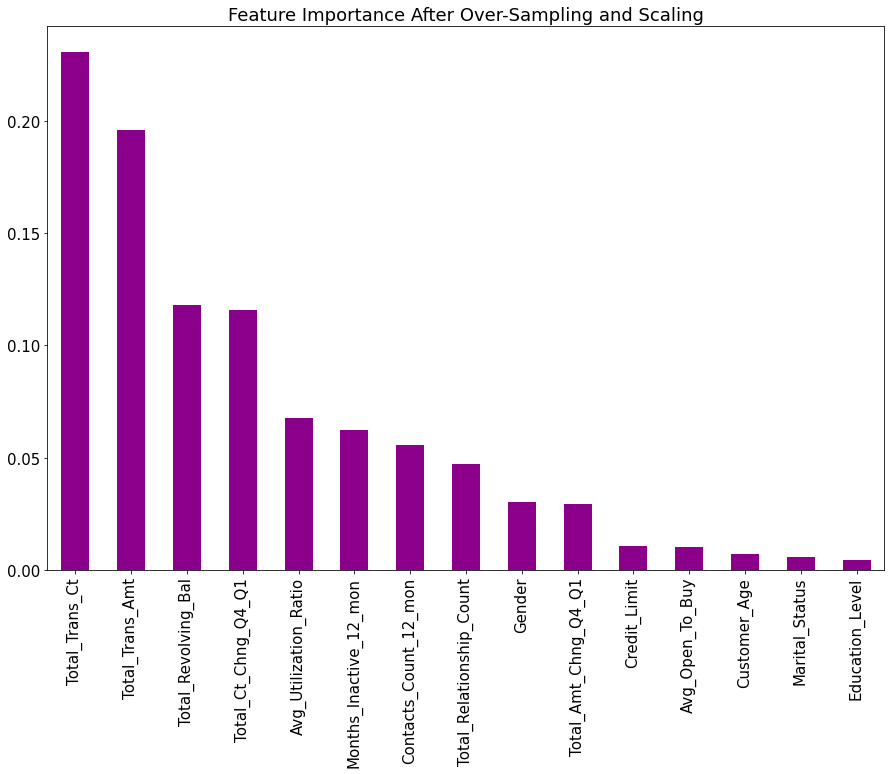

In [124]:
# plot feature importance
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(15).plot(kind='bar', figsize=(15,10),color='DarkMagenta');
plt.title('Feature Importance After Over-Sampling and Scaling', fontsize=18)
plt.rcParams['font.size'] = 15

* **Observation:** **Total_Trans_Ct (Total Transaction Count)** seems to be the most important feature.

# Conclusions

In this notebook, we focused on optimizing our random forest model by experimenting with different encoding, oversampling, and scaling techniques. Specifically, we explored various methods for encoding categorical features, oversampling our imbalanced dataset, and scaling our data to ensure optimal performance.

After applying these techniques, we plotted the feature importance of our model to identify which variables had the greatest impact on predicting customer churn. Based on our results, we have identified the following methods for our model building:
* Ordinal Encoder for encoding categorical features
* SMOTE for over-sampling for our imbalanced dataset
* Standard Scaler for normalizing
